# Data Science Salaries EDA 📊

The dataset has 607 rows and 12 columns about data science jobs, including salaries, job titles, experience levels, and remote work ratios. Salaries range from 2,859 to 600,000, averaging 112,298. Data spans 2020–2022 with no missing values. The goals are identifying the highest and lowest paying job titles, understanding salary distribution and detecting outliers ect.

In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [89]:
df = pd.read_csv('ds_salaries.csv')

In [90]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [91]:
df.tail()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M
606,606,2022,MI,FT,AI Scientist,200000,USD,200000,IN,100,US,L


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [93]:
df.shape

(607, 12)

In [94]:
df.columns

Index(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'],
      dtype='object')

In [95]:
df.drop('Unnamed: 0', inplace=True, axis=1)

In [96]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [97]:
df.duplicated().sum()

42

In [98]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [99]:
df.describe(include="object")

,experience_level,employment_type,job_title,salary_currency,employee_residence,company_location,company_size
count,607,607,607,607,607,607,607
unique,4,4,50,17,57,50,3
top,SE,FT,Data Scientist,USD,US,US,M
freq,280,588,143,398,332,355,326


In [100]:
df.nunique()

work_year               3
experience_level        4
employment_type         4
job_title              50
salary                272
salary_currency        17
salary_in_usd         369
employee_residence     57
remote_ratio            3
company_location       50
company_size            3
dtype: int64

In [101]:
df.select_dtypes(include='number').columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

See distribution of data using Histogram for continuous/numeric features

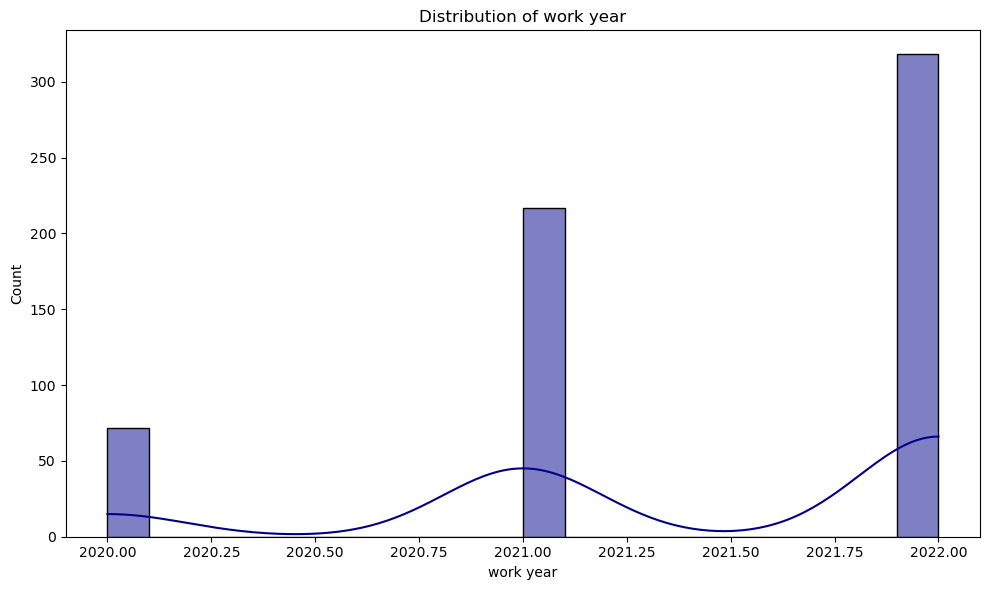

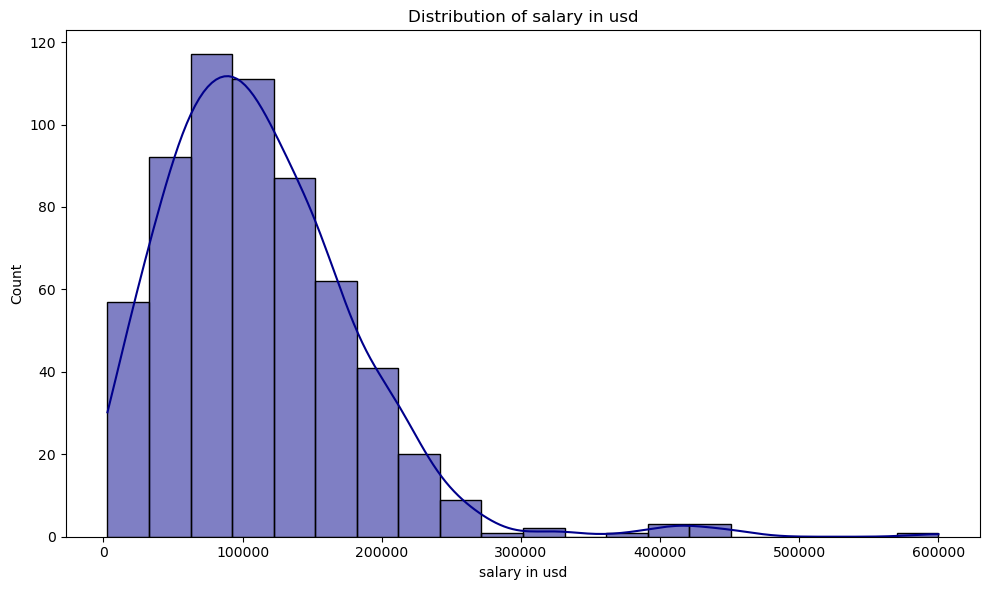

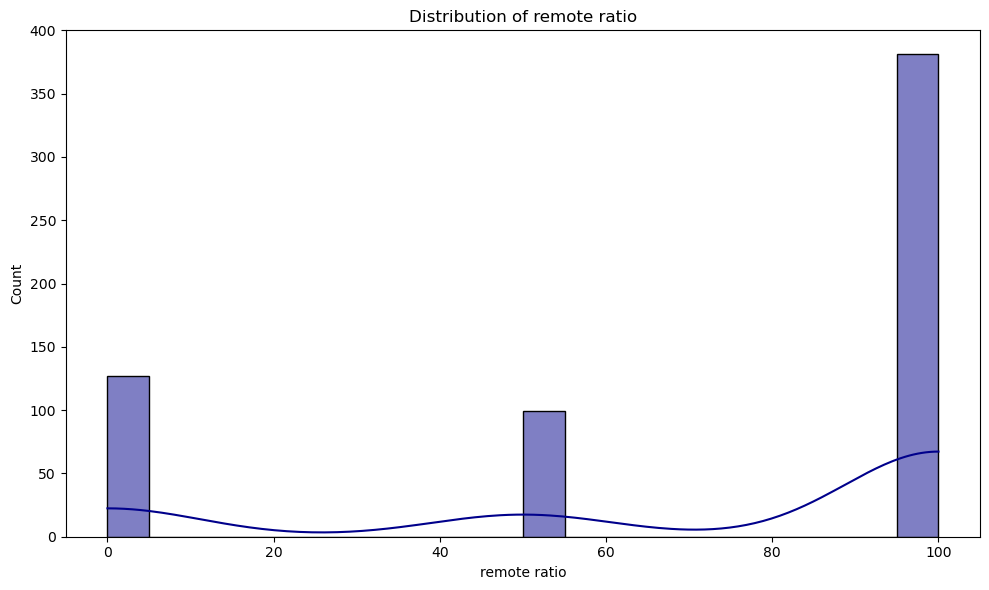

In [103]:
import warnings 
warnings.filterwarnings('ignore') #just to remove warning message

columns = ['work_year', 'salary_in_usd', 'remote_ratio']

for column in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], bins=20, color='darkblue', kde=True) 
    plt.title(f'Distribution of {column.replace("_", " ")}')
    plt.xlabel(column.replace("_", " "))
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()

See distribution of data using Bar Chart for categorical features

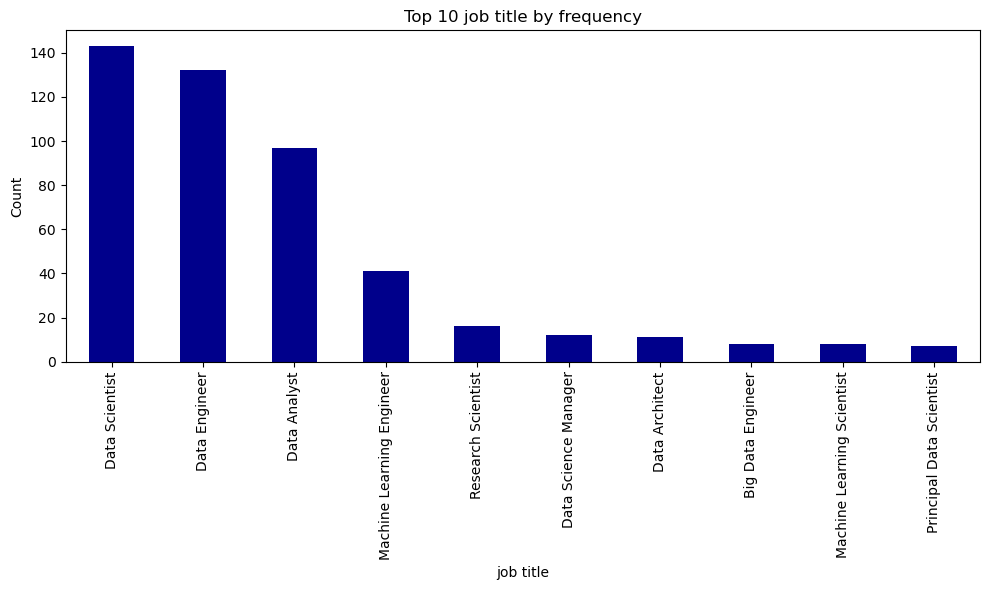

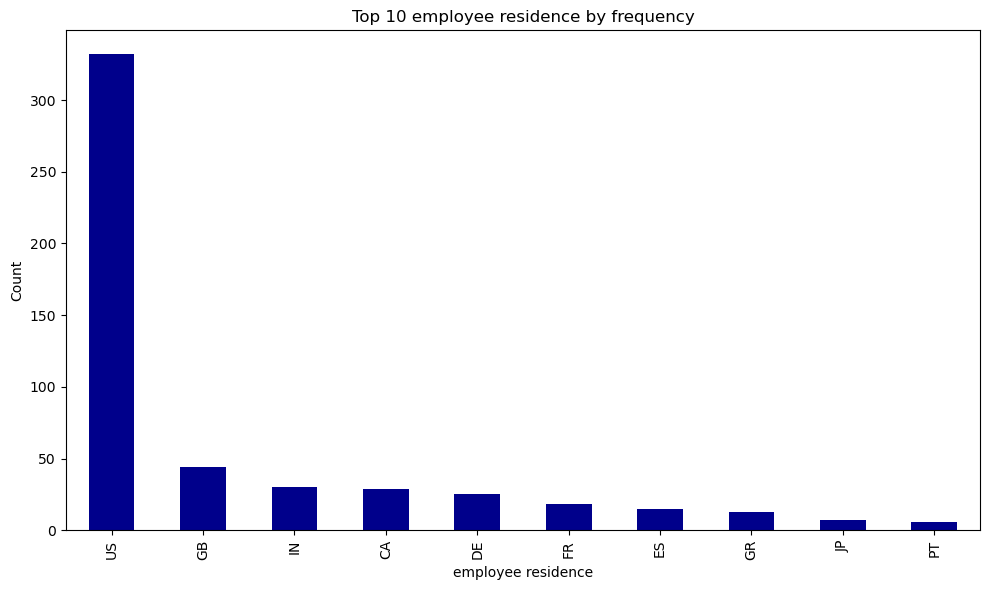

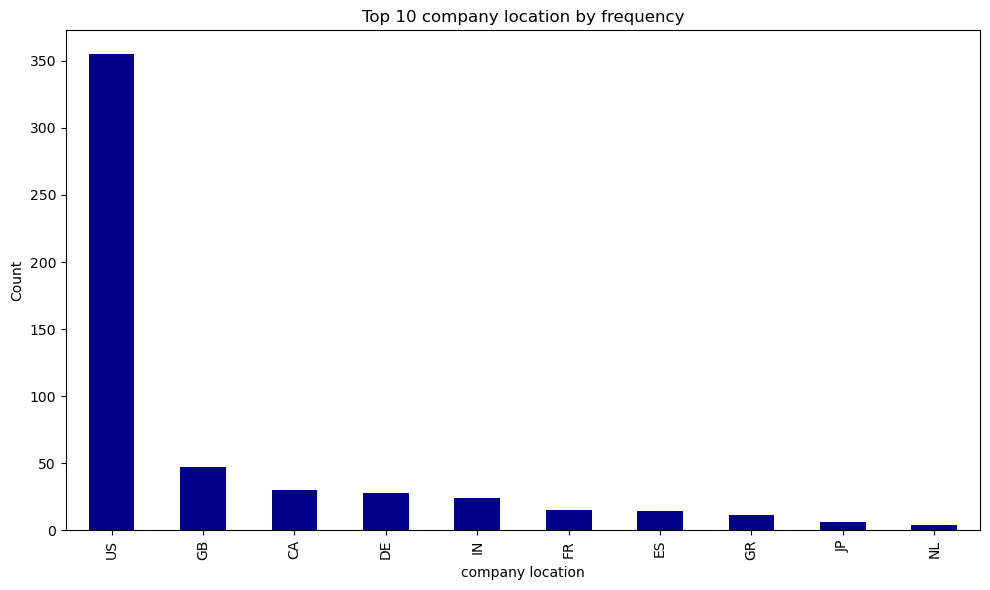

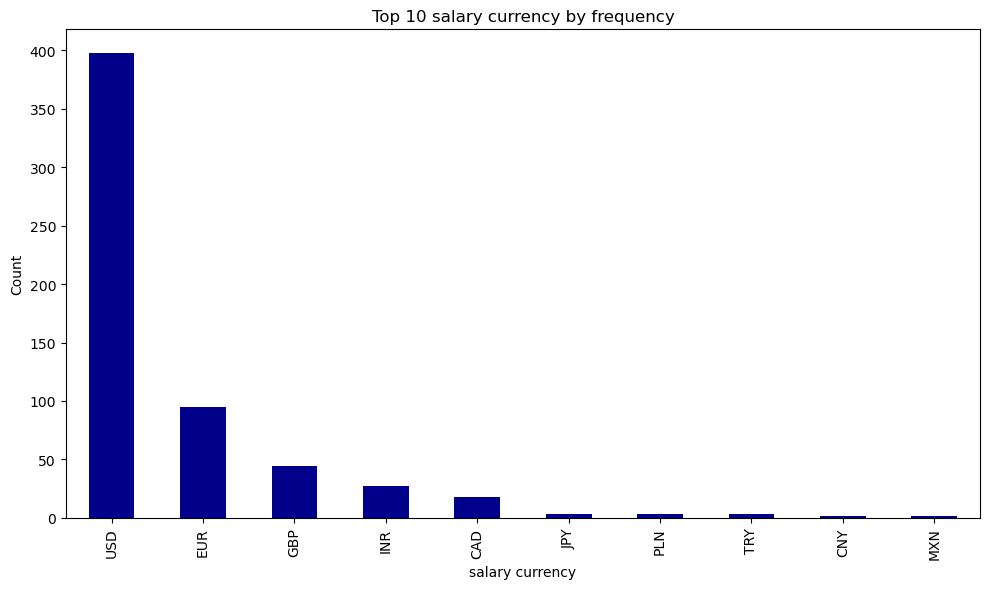

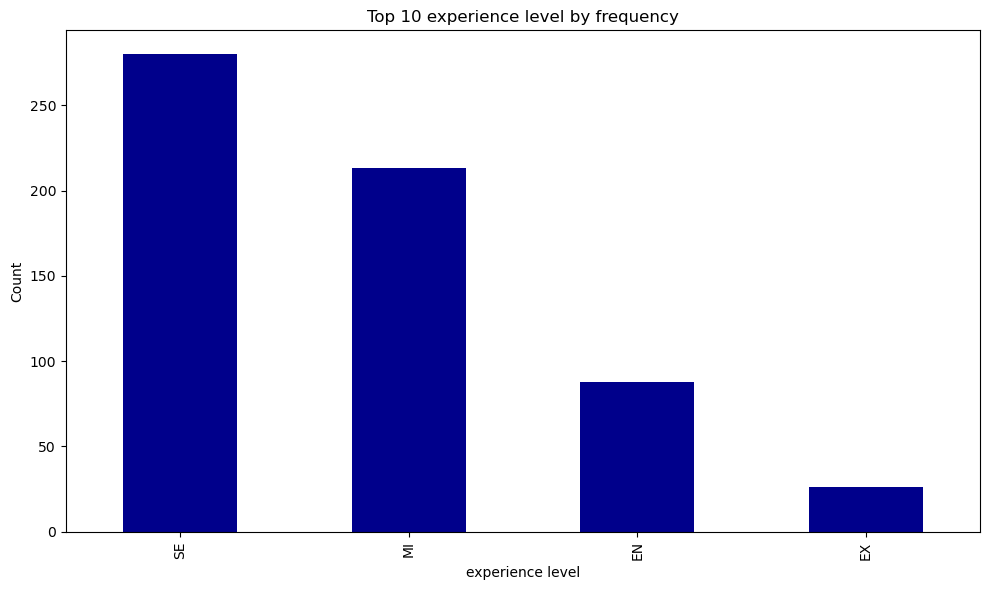

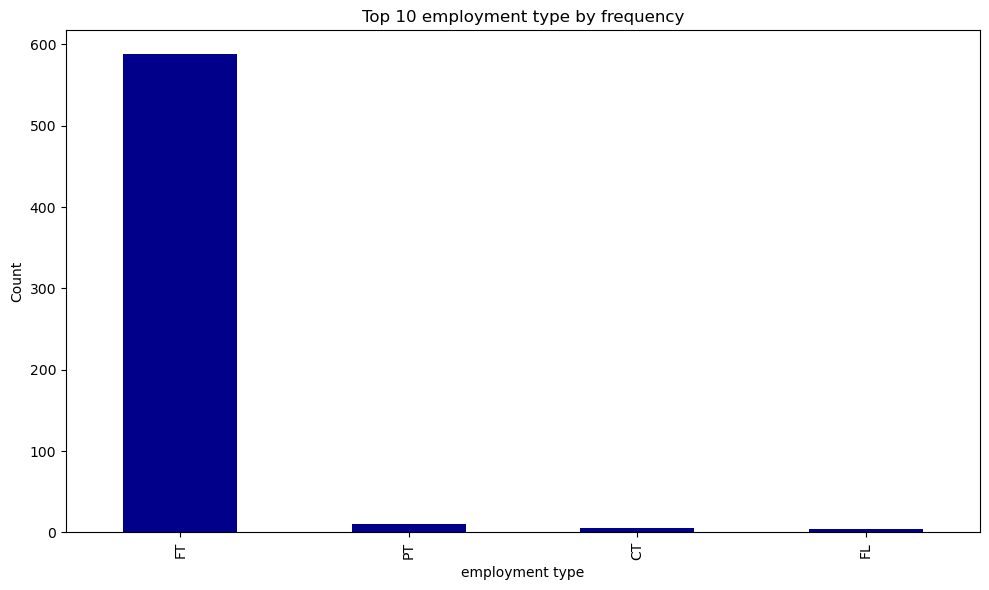

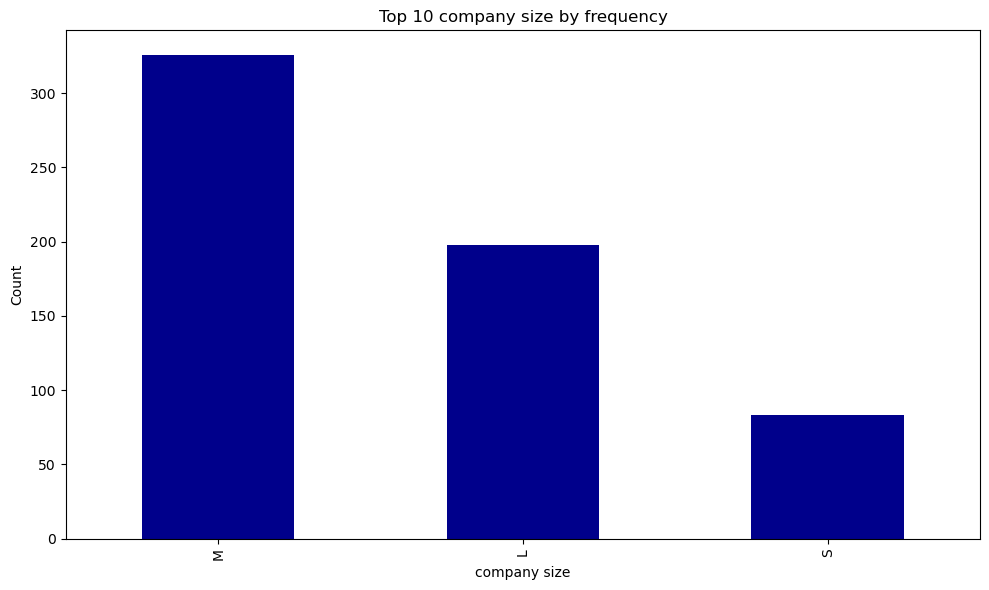

In [105]:
columns = ['job_title', 'employee_residence', 'company_location', 'salary_currency','experience_level', 'employment_type', 'company_size']

for column in columns:
    # Get the value counts and limit to the top 10
    value_counts = df[column].value_counts().head(10)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    value_counts.plot(kind='bar', color='darkblue')
    plt.title(f'Top 10 {column.replace("_", " ")} by frequency')
    plt.xlabel(column.replace("_", " "))
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

Box plot to identify outliers

Since salary_in_usd is already a standardized version of salary, we will box-plot it to see the overall distribution of salaries in USD, which gives insights into the range, median, outliers, and spread of salaries in dataset.

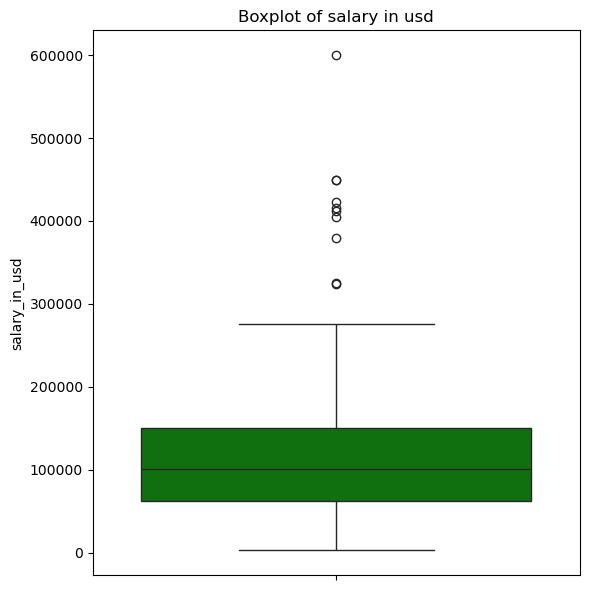

In [108]:
import warnings 
warnings.filterwarnings('ignore') #just to remove warning message

plt.figure(figsize=(6, 6)) 
sns.boxplot(data=df, y=df['salary_in_usd'] , color='green') 
plt.title(f'Boxplot of salary in usd')
plt.tight_layout()
plt.show()

The box plot of salary_in_usd shows most salaries fall within a typical range, but there are high outliers that could skew the analysis. These outliers need treatment to ensure accurate results.

To identifying the highest (Top 10) paying job titles

In [111]:
top_10_jobs = df.groupby('job_title')['salary_in_usd'].median().nlargest(10).index
top_10_jobs


Index(['Data Analytics Lead', 'Financial Data Analyst', 'Head of Data',
       'Principal Data Engineer', 'Data Architect', 'Analytics Engineer',
       'Principal Data Scientist', 'Director of Data Science',
       'Data Specialist', 'Applied Data Scientist'],
      dtype='object', name='job_title')

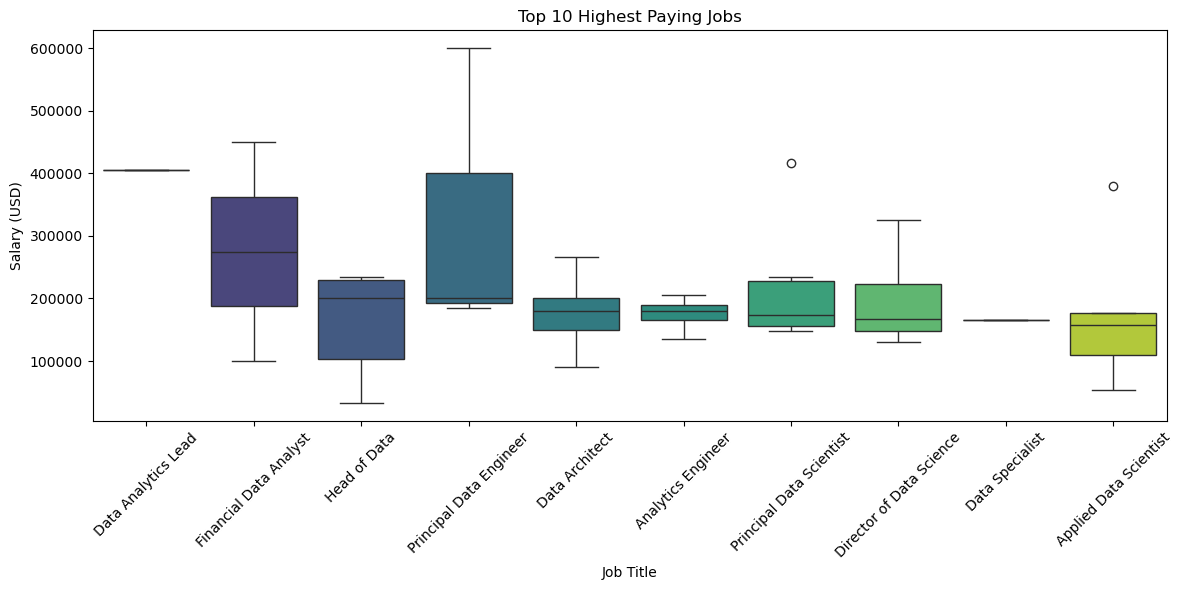

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='job_title', y='salary_in_usd',data=df[df['job_title'].isin(top_10_jobs)] , order=top_10_jobs, palette='viridis')
plt.xticks(rotation=45)
plt.title('Top 10 Highest Paying Jobs')
plt.xlabel('Job Title')
plt.ylabel('Salary (USD)')
plt.tight_layout()
plt.show()

To see how experience affects salaries

In [114]:
exp_sal = df.groupby('experience_level')['salary_in_usd'].median().index
exp_sal

Index(['EN', 'EX', 'MI', 'SE'], dtype='object', name='experience_level')

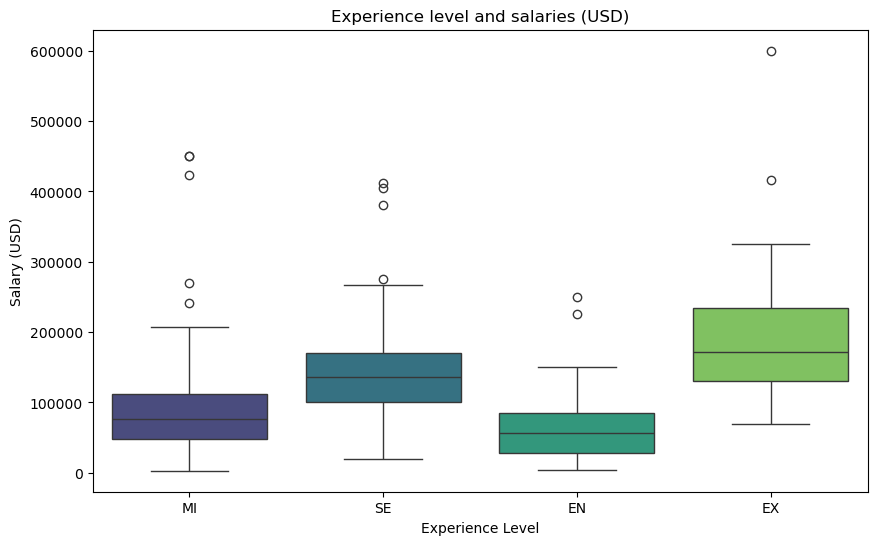

In [115]:
plt.figure(figsize=(10,6))
sns.boxplot(data= df[df['experience_level'].isin(exp_sal)] , x='experience_level', y='salary_in_usd' , palette='viridis' )
plt.title('Experience level and salaries (USD)')
plt.xlabel('Experience Level')
plt.ylabel('Salary (USD)')
plt.show()

Check the impact of remote work on salaries

In [117]:
remote_sal = df.groupby('remote_ratio')['salary_in_usd'].median().index
remote_sal

Index([0, 50, 100], dtype='int64', name='remote_ratio')

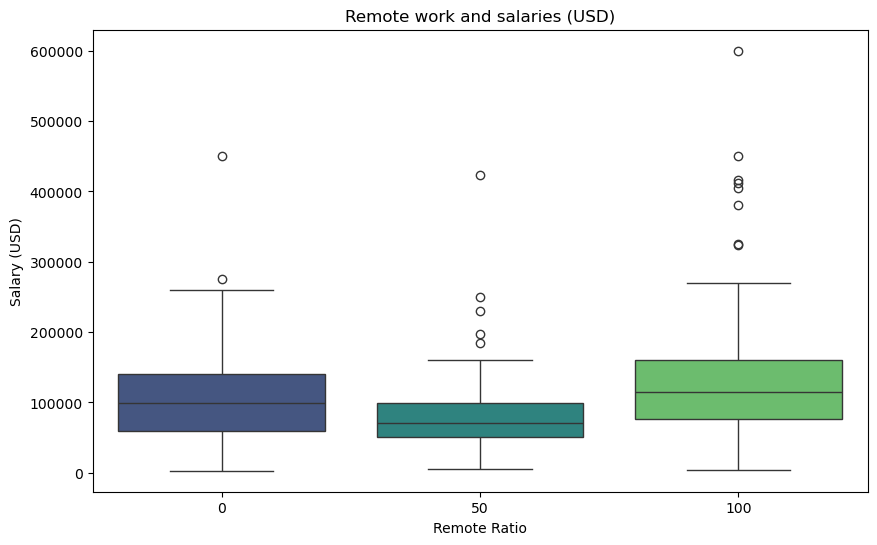

In [118]:
plt.figure(figsize=(10,6))
sns.boxplot(data = df[df['remote_ratio'].isin(remote_sal)], x='remote_ratio',y='salary_in_usd',palette='viridis')
plt.title('Remote work and salaries (USD)')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (USD)')
plt.show()

to see distribution of salaries (salary_in_usd) for each work year

In [120]:
years_salary = df.groupby('work_year')['salary_in_usd'].median()
years_salary

work_year
2020     75544.0
2021     82528.0
2022    120000.0
Name: salary_in_usd, dtype: float64

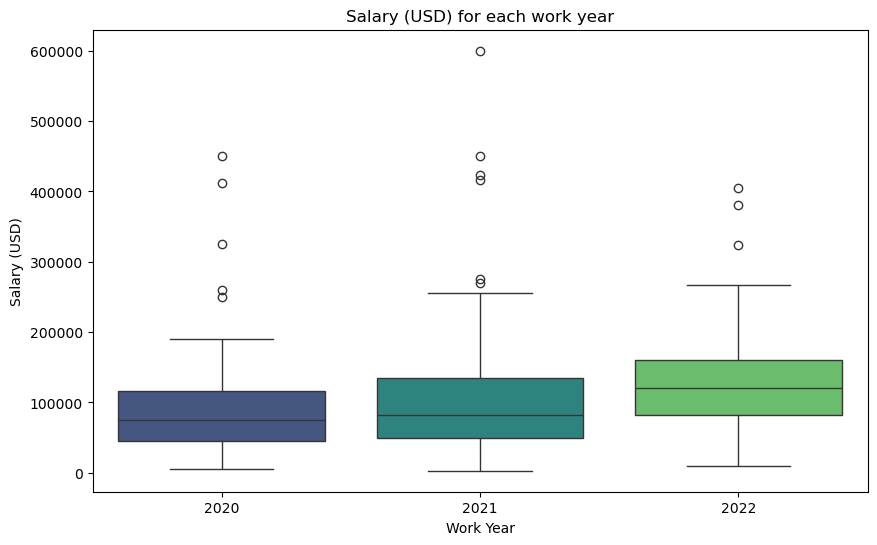

In [121]:
plt.figure(figsize=(10,6))
sns.boxplot(data= df[df['work_year'].isin(years_salary.index)],x='work_year',y='salary_in_usd',palette='viridis')
plt.title('Salary (USD) for each work year')
plt.xlabel('Work Year')
plt.ylabel('Salary (USD)')
plt.show()

Correlation matrix (shows the relationship between variables), Values range from:

1 for a perfect positive relationship (both variables increase together).
 
-1 for a perfect negative relationship (one increases while the other decreases).

 0 for no linear relationship.

In [123]:
s = df.select_dtypes(include='number').corr()
s

,work_year,salary,salary_in_usd,remote_ratio
work_year,1.000000,-0.087577,0.170493,0.076314
salary,-0.087577,1.000000,-0.083906,-0.014608
salary_in_usd,0.170493,-0.083906,1.000000,0.132122
remote_ratio,0.076314,-0.014608,0.132122,1.000000


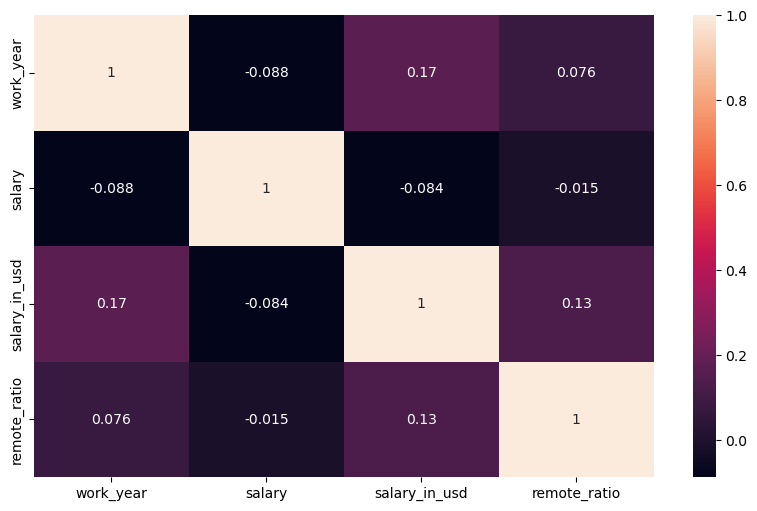

In [124]:
plt.figure(figsize=(10,6))
sns.heatmap(s,annot=True)
plt.show()

# Data Cleaning

Remove duplicates

In [127]:
df.drop_duplicates(inplace=True)

In [128]:
df.duplicated().sum()

0


Outliers Treatments

In [130]:
 def wisker(col):
     q1,q3 = np.percentile(col,[25,75])
     iqr = q3 - q1
     lw = q1 - 1.5 * iqr # lower wisker (values less than this are outliers) (min)
     uw = q3 + 1.5 * iqr # upper wisker (values more than this are outliers) (max)
     return lw, uw

In [131]:
df.select_dtypes(include="number").columns

Index(['work_year', 'salary', 'salary_in_usd', 'remote_ratio'], dtype='object')

In [132]:
lw,uw= wisker(df['salary_in_usd'])
df['salary_in_usd'] = np.where(df['salary_in_usd']<lw,lw,df['salary_in_usd'])
df['salary_in_usd'] = np.where(df['salary_in_usd']>uw,uw,df['salary_in_usd'])

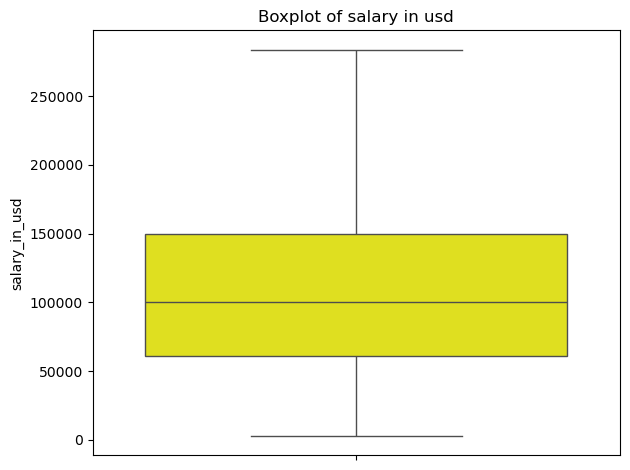

In [133]:
sns.boxplot(df['salary_in_usd'], color='yellow')
plt.title(f'Boxplot of salary in usd')
plt.tight_layout()
plt.show()